In [70]:
import networkx as nx
N = 100
m = 3
p = 0.6
g = nx.Graph( nx.powerlaw_cluster_graph(N,m,p))
degree_freq = nx.degree_histogram(g)
total_degree = sum([a * b for a, b in zip(degree_freq, range(0, len(degree_freq)))])
avg_k = total_degree / g.number_of_nodes()

k_max = len(degree_freq)
p_ = [x/g.number_of_nodes() for x in degree_freq]
k_avg = sum([k*p_[k] for k in range(k_max)])

def cdf(K):
    return sum([p_[k] for k in filter(lambda k: k <= K, range(k_max))])

cdf(k_avg)

0.7100000000000001

In [68]:
import numpy as np

beta = 0.0025
mu = 0.01

I0 = 0.02
S0 = 1.0 - I0
Sk = np.zeros((k_max))
Ik = np.zeros((k_max))
Skv = np.zeros(k_max)
Ikv = np.zeros(k_max)

for k in range(k_max):
    if cdf(k) > 1 - .40:
        Skv[k] = degree_freq[k]*S0
    else:
        Sk[k] = degree_freq[k]*S0


37.239999999999995

$P(I|k) = I_k = \frac{P(I  \cap  k)}{P(k)}$

Giulio $\dot I_k$
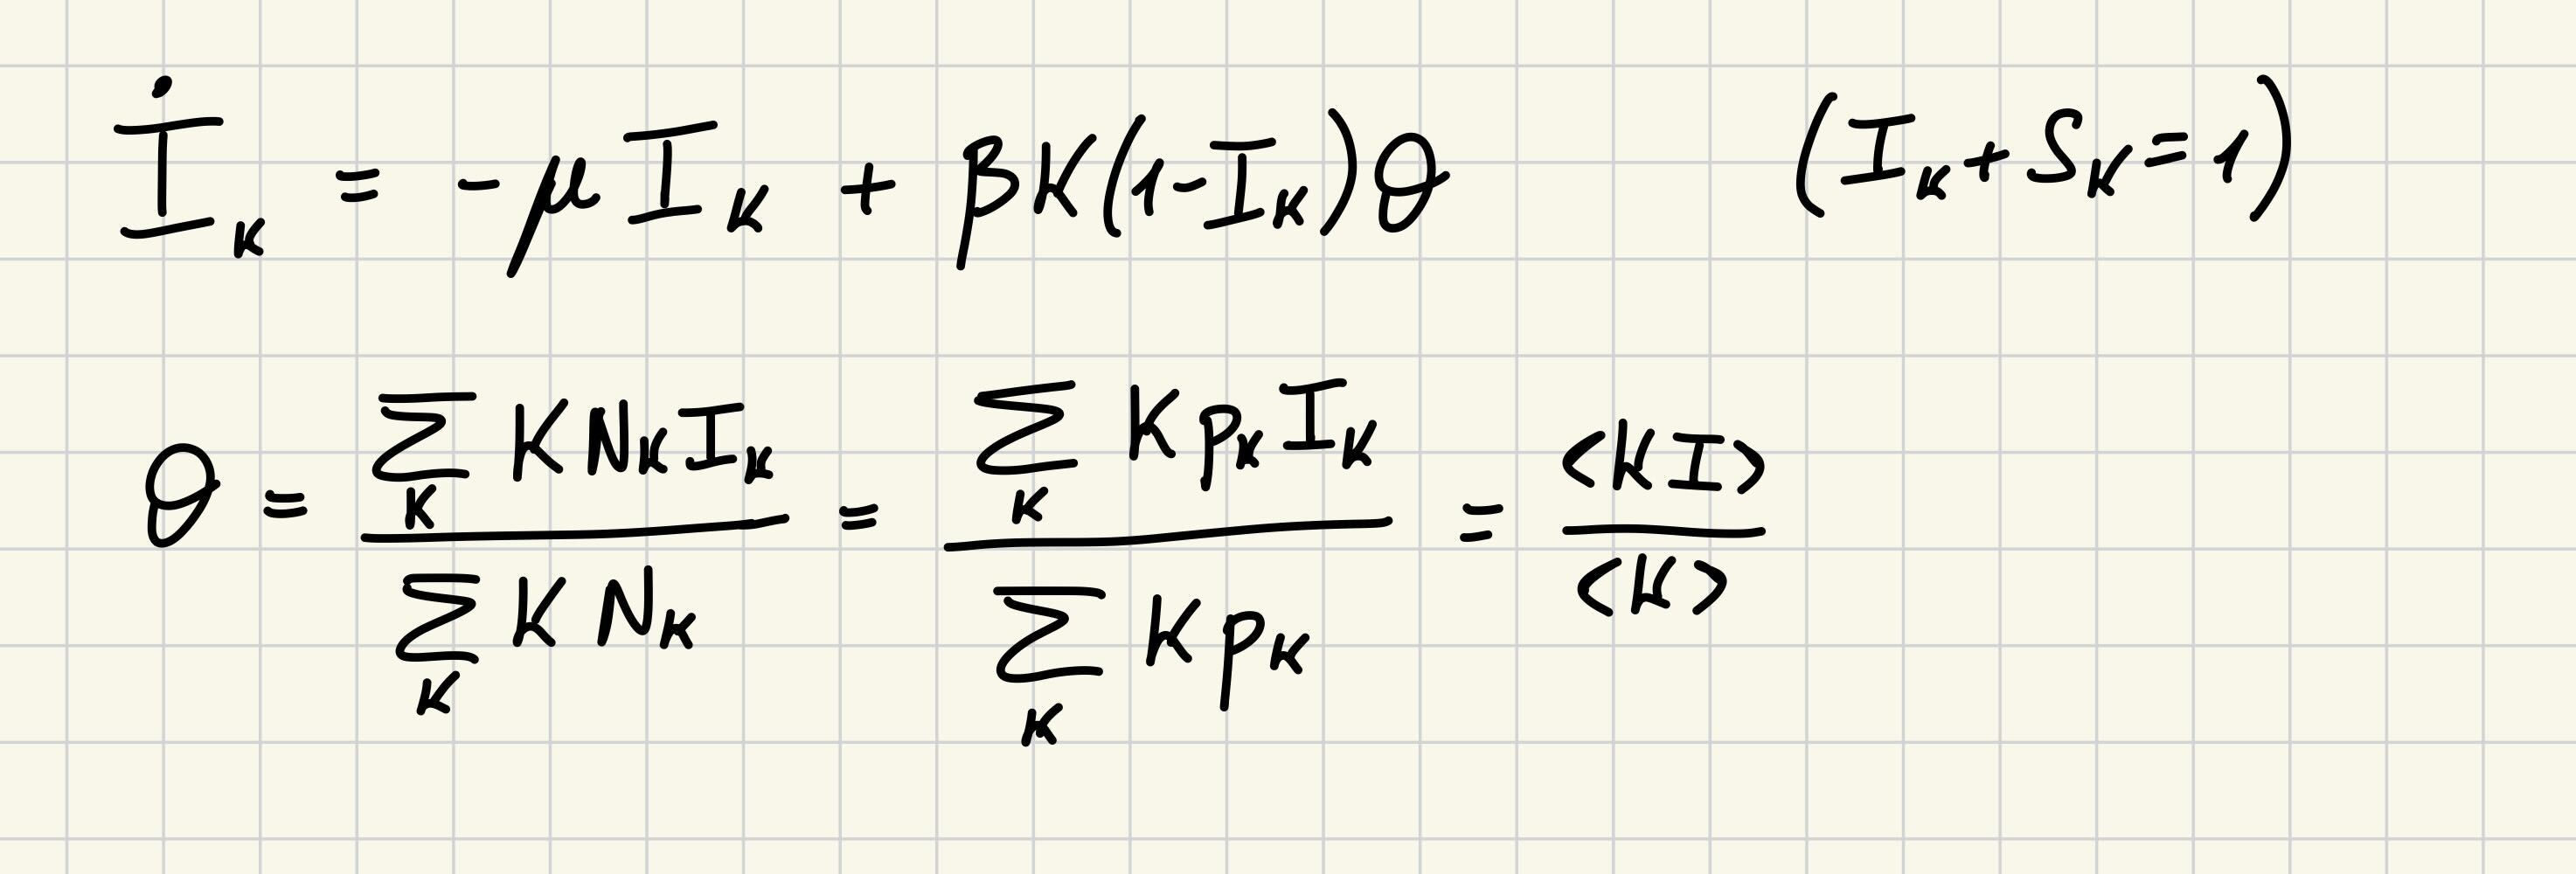


Giulio $\dot I$
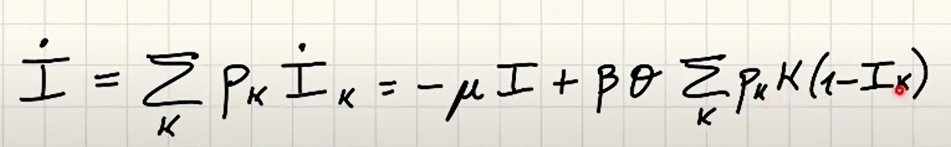

In [69]:
res = []
history = []
T = np.arange(1,10)
for t in T:
    # Calculate the mean-field
    theta = 0.0
    for k in range(len(degree_freq)):
        theta += k*Ik[k]/total_degree

    # Set initial global quantities
    S = 0.0
    I = 0.0
    R = 0.0

    # dIdt = np.zeros(k_max)
    # dIdt[k] = -mu * Ik[k] + beta*k*(1-Ik[k])*theta # \dot I_k
    # dIdt = sum([x*p_[k] for x in dIdt]) # \dot I
    # dSdt = -dIdt
    for k in range(k_max):
        delta_Ik = beta*k*theta*Sk[k] - mu*Ik[k]
        delta_Sk = -beta*k*theta*Sk[k] + mu*Ik[k]
        Sk[k] += delta_Sk
        Ik[k] += delta_Ik

    I += dIdt
    S += dSdt
    res.append((S, I))

St,It = map(np.array, zip(*res))

0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98
0.02 0.98


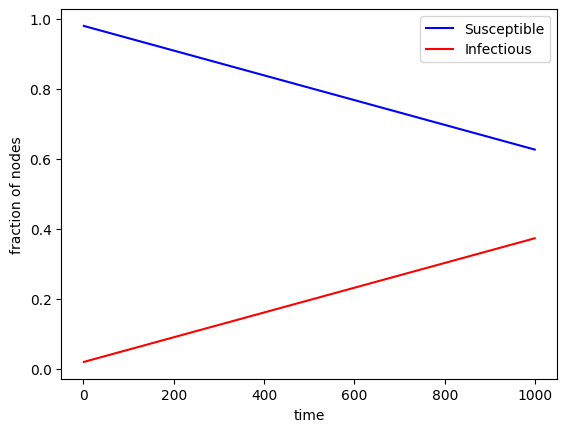

In [57]:
#plot results
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(T, St, 'b', label='Susceptible')
ax.plot(T, It, 'r', label='Infectious')
ax.legend()
#ax.set(yscale='log')
ax.set_xlabel("time")
ax.set_ylabel("fraction of nodes")
plt.show()

In [1]:

N = 100
N = 100
m = 3
p = 0.6
g = nx.powerlaw_cluster_graph(N,m,p)
g.pos = nx.spring_layout(g)

steps = 10000

def run_voter_model(g, p, steps ,show_output = False):

    for i in g.nodes:
        g.nodes[i]['state'] = 1 if rd.random() < p else 0

    for step in range(steps):
        listener = rd.choice(list(g.nodes))
        neighbors = list(g.neighbors(listener))
        if len(neighbors) == 0:
            continue
        speaker = rd.choice(neighbors)
        # Update the listener's state to match the speaker's state
        g.nodes[listener]['state'] = g.nodes[speaker]['state']
        votes = [g.nodes[v]['state'] for v in nx.nodes(g)]
        total_opinion = sum(votes)
        if total_opinion in [0*N, 1*N]:
            variance = np.var(votes)   
            if show_output:        
                print(f"consensus {total_opinion} reached at {step} variance {variance}")
            return step, total_opinion
            break

    return (steps, total_opinion)

step, total_opinion = run_voter_model(g,p, steps, True)



NameError: name 'nx' is not defined

In [13]:
#
def run_simulations(g, p):
    res = []
    for i in range(100):
        res.append(run_voter_model(g,p, steps=10000))
    return res

def plot_sim(res):

    import matplotlib.pyplot as plt

    # Plot the scatter plot of consensus times
    plt.figure(figsize=(10, 6))
    plt.scatter( [result[0] for result in res], [result[1] for result in res], color='blue', alpha=0.6)

    plt.grid(True)
    plt.show()


In [ ]:
plot_sim(run_simulations(0.4))

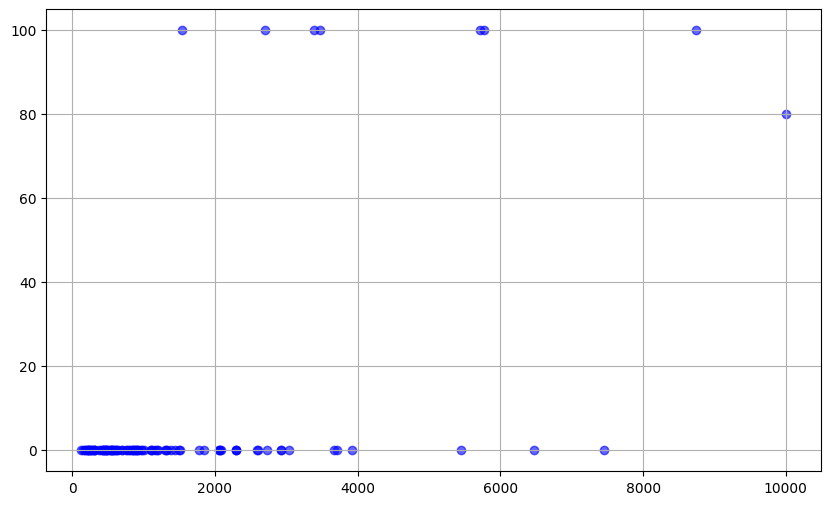

In [51]:
plot_sim(run_simulations(0.5))

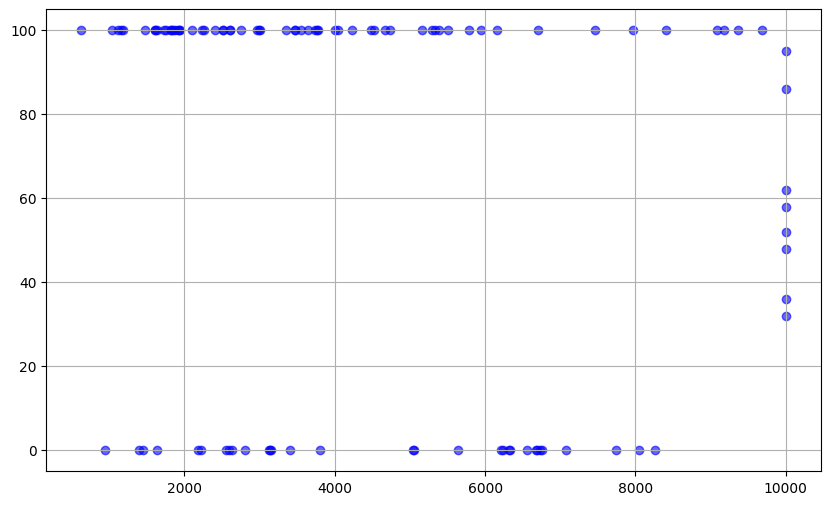

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
import random as rd
import numpy as np

N = 100
m = 3
p = 0.6
g = nx.powerlaw_cluster_graph(N,m,p)
g.pos = nx.spring_layout(g)
plot_sim(run_simulations(g, p))

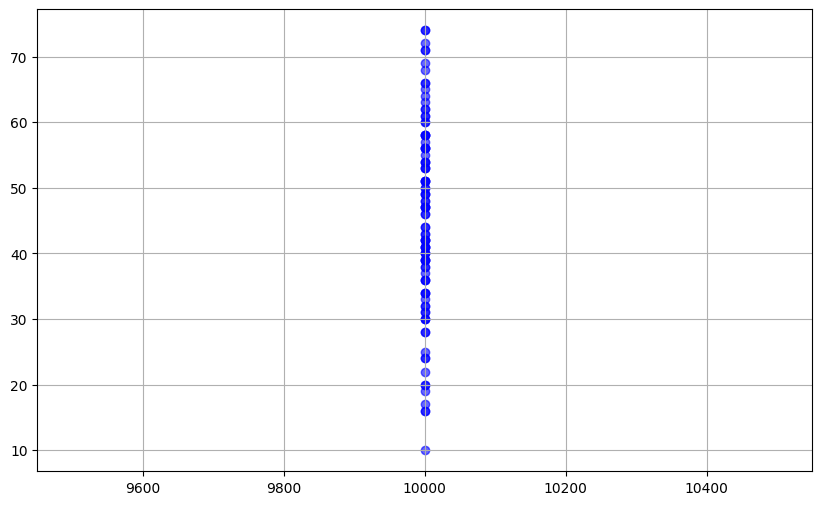

In [9]:
import networkx as nx
g = nx.read_graphml("dependency_graph.graphml")
plot_sim(run_simulations(0.6))